In [1]:
import os
import pandas as pd
import seaborn as sns
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import subprocess
%matplotlib inline

### First, define sample's names and coresponding FASTQ files with reads (here pair reads)

Define dictionary with samples as keys and lists with FASTQ files (with left and right reads) as values

In [2]:
raw_reads = {
    
   "alpha_1000_1" : ["Sample1-mix1-1-1000-alpha_S1_L001_R1_001.fastq.gz", 
                     "Sample1-mix1-1-1000-alpha_S1_L001_R2_001.fastq.gz"],

   "alpha_1000_2" : ["Sample2-mix1-1-1000-alpha_S2_L001_R1_001.fastq.gz",
                     "Sample2-mix1-1-1000-alpha_S2_L001_R2_001.fastq.gz"],
    
   "beta_1000_1" :  ["Sample1-mix1-1-1000-beta_S7_L001_R1_001.fastq.gz",
                     "Sample1-mix1-1-1000-beta_S7_L001_R2_001.fastq.gz"],

   "beta_1000_2" :  ["Sample2-mix1-1-1000-beta_S8_L001_R1_001.fastq.gz",
                     "Sample2-mix1-1-1000-beta_S8_L001_R2_001.fastq.gz"],

   "alpha_100_1" :  ["Sample3-mix2-1-100-alpha_S3_L001_R1_001.fastq.gz",
                     "Sample3-mix2-1-100-alpha_S3_L001_R2_001.fastq.gz"],
    
   "alpha_100_2" :  ["Sample4-mix2-1-100-alpha_S4_L001_R1_001.fastq.gz",
                     "Sample4-mix2-1-100-alpha_S4_L001_R2_001.fastq.gz"],

   "beta_100_1" :   ["Sample3-mix2-1-100-beta_S9_L001_R1_001.fastq.gz",
                     "Sample3-mix2-1-100-beta_S9_L001_R2_001.fastq.gz"],
   
   "beta_100_2" :   ["Sample4-mix2-1-100-beta_S10_L001_R1_001.fastq.gz",
                     "Sample4-mix2-1-100-beta_S10_L001_R2_001.fastq.gz"],

   "alpha_10_1" :   ["Sample5-mix3-1-10-alpha_S5_L001_R1_001.fastq.gz",
                     "Sample5-mix3-1-10-alpha_S5_L001_R2_001.fastq.gz"],
    
   "alpha_10_2" :   ["Sample6-mix3-1-10-alpha_S6_L001_R1_001.fastq.gz",
                     "Sample6-mix3-1-10-alpha_S6_L001_R2_001.fastq.gz"],

   "beta_10_1" :    ["Sample5-mix3-1-10-beta_S11_L001_R1_001.fastq.gz",
                     "Sample5-mix3-1-10-beta_S11_L001_R2_001.fastq.gz"],

   "beta_10_2" :    ["Sample6-mix3-1-10-beta_S12_L001_R1_001.fastq.gz",
                     "Sample6-mix3-1-10-beta_S12_L001_R2_001.fastq.gz"]
}



Define function which will run minnn

In [28]:
def run_minnn(sample):
    r1 = raw_reads[sample][0]
    r2 = raw_reads[sample][1]
    
    minnn_extract = """\
        minnn extract \
        -f \
        --threads 4 \
        --pattern "(FULL:tggtatcaacgcagagt(UMI:nnnntnnnntnnnn)tct)\*" \
        --input ../raw_data/repseq/%s ../raw_data/repseq/%s \
        --output ../results/repseq/extracted-%s.mif
    """%(r1, r2, sample)
    
    minnn_correct = """\
        minnn correct \
            -f \
            --groups UMI \
            --input ../results/repseq/extracted-%s.mif \
            --output ../results/repseq/corrected-%s.mif
    """%(sample, sample)
    
    minnn_sort = """\
        minnn sort \
            -f \
            --groups UMI \
            --input ../results/repseq/corrected-%s.mif \
            --output ../results/repseq/sorted-%s.mif
    """%(sample, sample)
    
    minnn_consensus = """\
        minnn consensus -Xmx30G \
            -f \
            --threads 4 \
            --groups UMI \
            --input ../results/repseq/sorted-%s.mif \
            --output ../results/repseq/consensus-%s.mif
    """%(sample, sample)
    
    minnn_2fastq = """\
        minnn mif2fastq \
            -f \
            --input ../results/repseq/consensus-%s.mif  \
            --group R1=../results/repseq/R1-%s.fastq \
            R2=../results/repseq/R2-%s.fastq
        """ % (sample,sample,sample)
    
    os.system(minnn_extract)
    os.system(minnn_correct)
    os.system(minnn_sort)
    os.system(minnn_consensus)
    os.system(minnn_2fastq)

In [ ]:
#         --score-threshold -25 \
#         --bitap-max-errors 5 \

Define function which will run mixcr on raw data or minn processed data

In [ ]:
def run_mixcr(sample, raw):

    if not raw:
        r1 = '../results/repseq/R1-%s.fastq'%sample
        r2 = '../results/repseq/R2-%s.fastq'%sample
        suffix = 'minnn'
    else:
        r1 = '../raw_data/repseq/' + str(raw_reads[sample][0])
        r2 = '../raw_data/repseq/' + str(raw_reads[sample][1])
        suffix = 'raw'
        
    mixcr_analyze = """\
        mixcr amplicon -f \
            --species hsa \
            --report ../results/repseq/mixcr_align_report \
            -OvParameters.geneFeatureToAlign=VTranscriptWithP %s %s \
            ../results/repseq/%s_%s.vdjca
    """%(r1, r2, sample, suffix)
    
    subprocess

In [29]:
def run_mixcr(sample, raw):
    if not raw:
        r1 = '../results/repseq/R1-%s.fastq'%sample
        r2 = '../results/repseq/R2-%s.fastq'%sample
        suffix = 'minnn'
    else:
        r1 = '../raw_data/repseq/' + str(raw_reads[sample][0])
        r2 = '../raw_data/repseq/' + str(raw_reads[sample][1])
        suffix = 'raw'

    mixcr_align = """\
        mixcr align -f \
            --species hsa \
            --report ../results/repseq/mixcr_align_report \
            -OvParameters.geneFeatureToAlign=VTranscriptWithP %s %s \
            ../results/repseq/%s_%s.vdjca
    """%(r1, r2, sample, suffix)
    
    mixcr_assemble = """\
        mixcr assemble \
            -r ../results/repseq/mixcr_assemble_report \
            ../results/repseq/%s_%s.vdjca \
            ../results/repseq/%s_%s.clns
    """%(sample, suffix, sample, suffix)

    mixcr_export = """\
        mixcr exportClones \
            ../results/repseq/%s_%s.clns \
            ../results/repseq/%s_%s.txt
    """%(sample, suffix, sample, suffix)
    
    
    os.system(mixcr_align)
    os.system(mixcr_assemble)
    os.system(mixcr_export)

Run minnn to correct raw data and than run mixcr on corrected data. Also, for comparing, run mixcr directly on raw data.

In [ ]:
for sample in raw_reads:
    run_minnn(sample)
    run_mixcr(sample, True) #run mixcr on raw data
    run_mixcr(sample, False) #run mixcr on minnn processed data

        minnn extract         -f         --threads 4         --pattern "(FULL:tggtatcaacgcagagt(UMI:nnnntnnnntnnnn)tct)\*"         --input ../raw_data/repseq/Sample1-mix1-1-1000-alpha_S1_L001_R1_001.fastq.gz ../raw_data/repseq/Sample1-mix1-1-1000-alpha_S1_L001_R2_001.fastq.gz         --output ../results/repseq/extracted-S1.mif
    
        minnn correct             -f             --groups UMI             --input ../results/repseq/extracted-S1.mif             --output ../results/repseq/corrected-S1.mif
    
        minnn sort             -f             --groups UMI             --input ../results/repseq/corrected-S1.mif             --output ../results/repseq/sorted-S1.mif
    
        minnn consensus -Xmx30G             -f             --threads 4             --groups UMI             --input ../results/repseq/sorted-S1.mif             --output ../results/repseq/consensus-S1.mif
    
        minnn mif2fastq             -f             --input ../results/repseq/consensus-S1.mif              

        mixcr align -f             --species hsa             --report ../results/repseq/mixcr_align_report             -OvParameters.geneFeatureToAlign=VTranscriptWithP ../results/repseq/R1-S8.fastq ../results/repseq/R2-S8.fastq             ../results/repseq/S8_minnn.vdjca
    
        mixcr assemble             -r ../results/repseq/mixcr_assemble_report             ../results/repseq/S8_minnn.vdjca             ../results/repseq/S8_minnn.clns
    
        mixcr exportClones             ../results/repseq/S8_minnn.clns             ../results/repseq/S8_minnn.txt
    


In [11]:
df_cache = {}

In [12]:
def read_table(sample, raw):
    key = "%s%s"%(sample, raw)
    if key in df_cache.keys():
        return df_cache[key]
        
    if not raw:
        suffix = 'minnn'
    else:
        suffix = 'raw'
        
    data = '../results/repseq/%s_%s.txt'%(sample, suffix)
    df = pd.read_table(data)
    df['sample'] = sample
    df['raw']    = raw
    df_cache[key] = df
    return df

def merge_tables(sample):
    key = "%s"%(sample)
    if key in df_cache.keys():
        return df_cache[key]
    
    raw   = read_table(sample, True)
    minnn = read_table(sample, False)
    merge = raw.merge(minnn, on='nSeqCDR3', how='outer', suffixes=['_raw', '_minnn'])
    for col in ['cloneCount', 'cloneFraction']:
        for rw in ['raw', 'minnn']:
            merge['%s_%s'%(col, rw)].fillna(0, inplace=True)    
    df_cache[key] = merge
    return merge

Define two functions:
plot_correlation_raw_minnn - plot clonotype count in raw data VS clonotype count in minnn processed data for one sample. Clonotype size in processed data must be smaller (or equal) to its size in raw data, because insted of number of sequnce reads in minnn data we count number of UMI. But general correlation of clonotype sizes must exist.
plot_correlation_raw_minnn_boxplot - plot boxplot of spearman correlations between clonotype counts in raw data and clonotype counts in minnn processed data for all samples.

In [13]:
def plot_correlation_raw_minnn(sample, min_raw_count=1):
    merge = merge_tables(sample)
    filtered = merge[merge.cloneCount_raw >= min_raw_count]
    graph = sns.jointplot('cloneCount_raw', 'cloneCount_minnn',
                      data = filtered,
                      kind = 'reg', 
                      stat_func=spearmanr)
    graph.ax_joint.set_xscale('log')
    graph.ax_joint.set_yscale('log')
    graph.ax_joint.set_xlim(xmin=0.9) 
    graph.ax_joint.set_ylim(ymin=0.9) 
    corr = spearmanr(filtered['cloneCount_raw'], filtered['cloneCount_minnn'])
    return (graph, corr)

In [14]:
df_cache

{}

Sample - S1


/home/taumata/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/home/taumata/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
/home/taumata/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


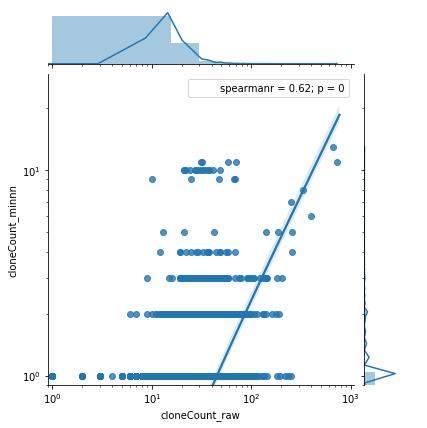

Sample - S7


/home/taumata/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/home/taumata/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
/home/taumata/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


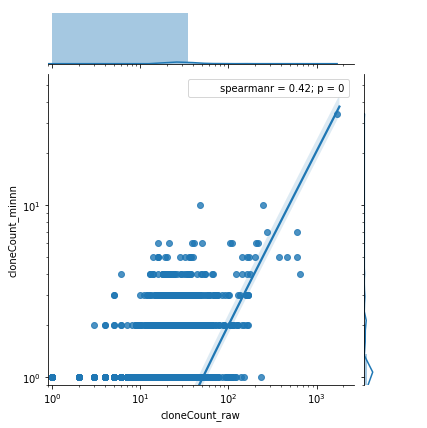

Sample - S2


/home/taumata/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/home/taumata/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
/home/taumata/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


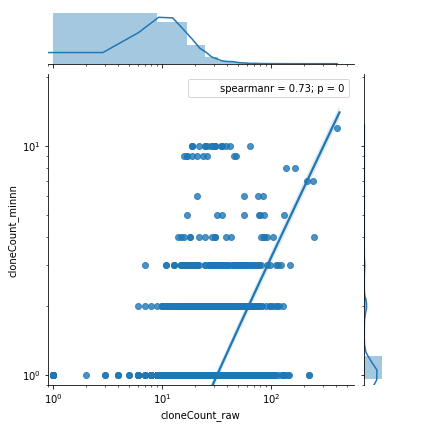

Sample - S8


/home/taumata/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/home/taumata/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
/home/taumata/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


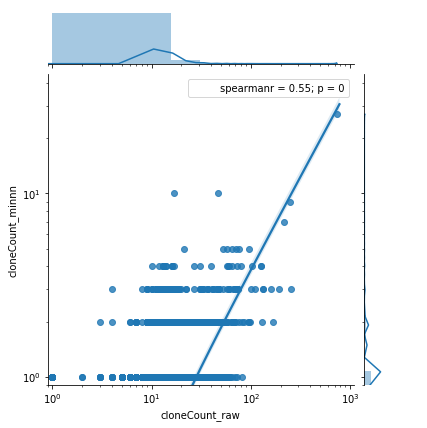

Sample - S3


/home/taumata/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/home/taumata/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
/home/taumata/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


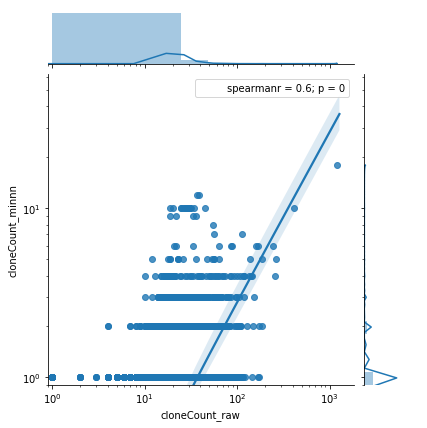

Sample - S9


/home/taumata/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/home/taumata/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
/home/taumata/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


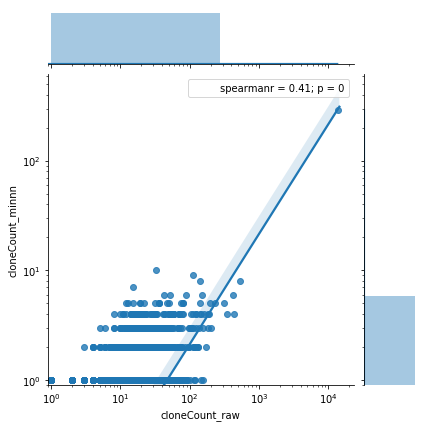

Sample - S4


/home/taumata/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/home/taumata/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
/home/taumata/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


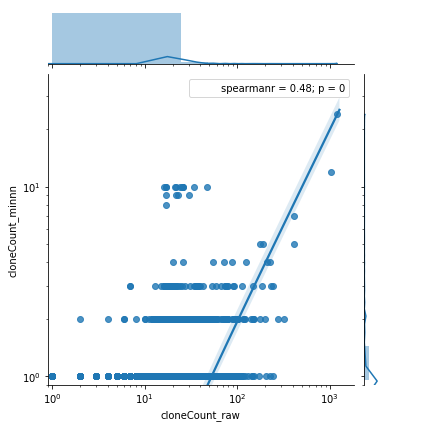

Sample - S10


/home/taumata/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/home/taumata/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
/home/taumata/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


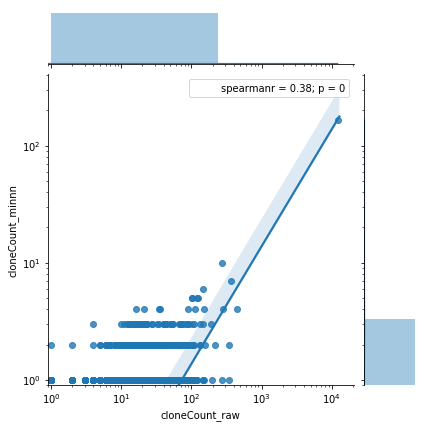

Sample - S5


/home/taumata/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/home/taumata/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
/home/taumata/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


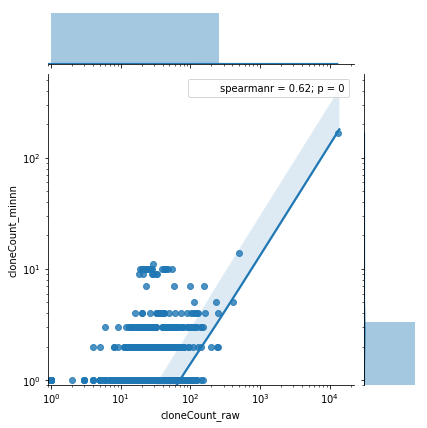

Sample - S11


/home/taumata/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/home/taumata/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
/home/taumata/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


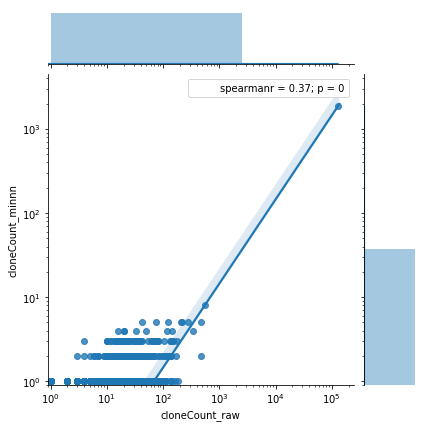

Sample - S6


/home/taumata/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/home/taumata/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
/home/taumata/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


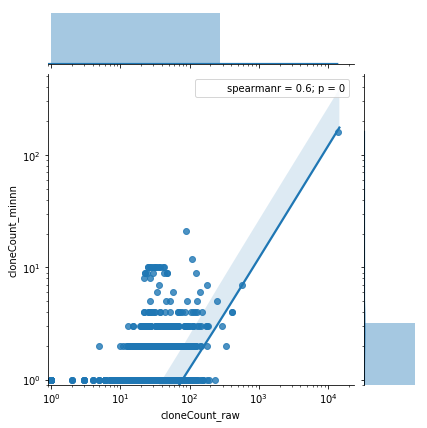

Sample - S12


/home/taumata/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/home/taumata/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
/home/taumata/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


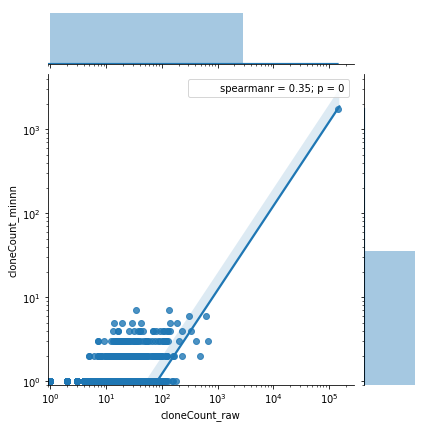

In [27]:
for sample in raw_reads:
    print("Sample - "+str(sample))
    plot_correlation_raw_minnn(sample)
    plt.show()

In [16]:
def plot_correlation_raw_minnn_boxplot(min_raw_count = 1):
    corrs = []
    for sample in raw_reads:
        merge = merge_tables(sample)
        filtered = merge[merge.cloneCount_raw >= min_raw_count]
        corr = spearmanr(filtered['cloneCount_raw'], filtered['cloneCount_minnn'])[0]
        corrs.append(corr)
    
    plt.boxplot(corrs,labels=["Raw vs MiNNN"])
    plt.ylabel("spearmanr")

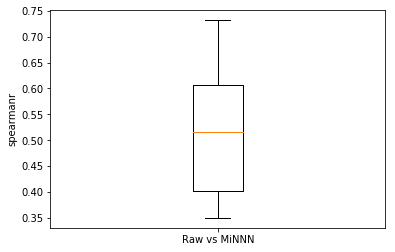

In [17]:
plot_correlation_raw_minnn_boxplot()

With minnn correction the number of erroneous clonotype is expected to be lower than in raw data and so correlation between clonotype sizes between biological replicas is expected to be higher.
Function plot_sample_correlation - plot correlation between biological replicas.
Biological replicas are: S1-S2, S3-S4, S5-S6, S7-S8, S9-S10, S11-S12.

In [18]:
def merge_pair(sample1, sample2, raw):
    key = "%s%s%s"%(sample1, sample2, raw)
    if key in df_cache:
        return df_cache[key]
    
    data1 = read_table(sample1, raw)
    data2 = read_table(sample2, raw)
    df = data1.merge(data2, on='nSeqCDR3', how='outer', suffixes=['_1', '_2'])
    for col in ['cloneCount', 'cloneFraction']:
        for rw in ['1', '2']:
            df['%s_%s'%(col, rw)].fillna(0, inplace=True)    
    df_cache[key] = df
    return df

In [19]:
def plot_sample_correlation(sample1, sample2, raw, min_count_1=1, min_count_2=1):
    merge = merge_pair(sample1, sample2, raw)
    filtered = merge[(merge.cloneCount_1 >= min_count_1) & (merge.cloneCount_2 >= min_count_2)]
    
    graph = sns.jointplot('cloneCount_1', 'cloneCount_2',
                      data = filtered,
                      kind = 'reg',                    
                      stat_func=spearmanr)
    graph.set_axis_labels(sample1, sample2, fontsize=16)
    corr = spearmanr(filtered['cloneCount_1'], filtered['cloneCount_2'])
    return (graph, corr)

S1	S2	RAW


/home/taumata/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


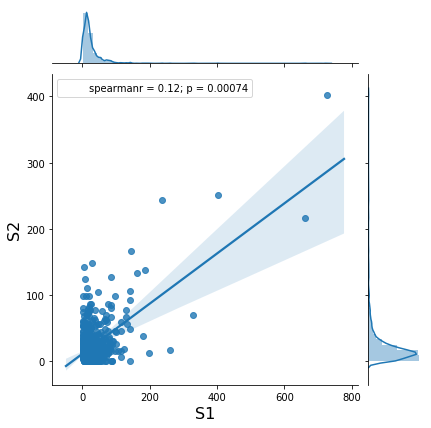

S1	S2	after MINNN


/home/taumata/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


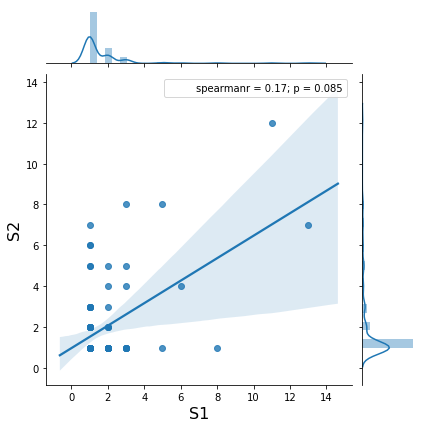

S3	S4	RAW


/home/taumata/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


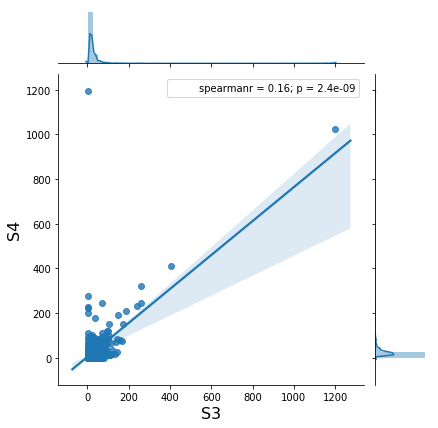

S3	S4	after MINNN


/home/taumata/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


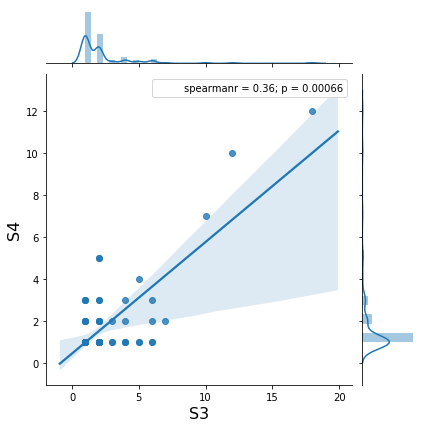

S5	S6	RAW


/home/taumata/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


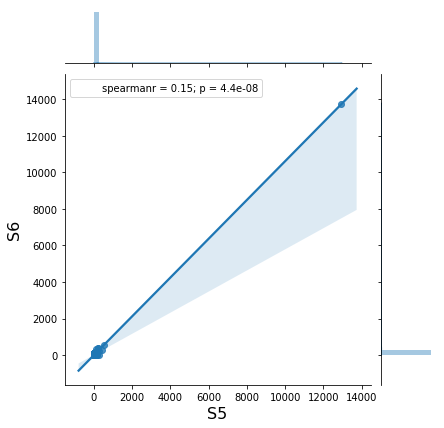

S5	S6	after MINNN


/home/taumata/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


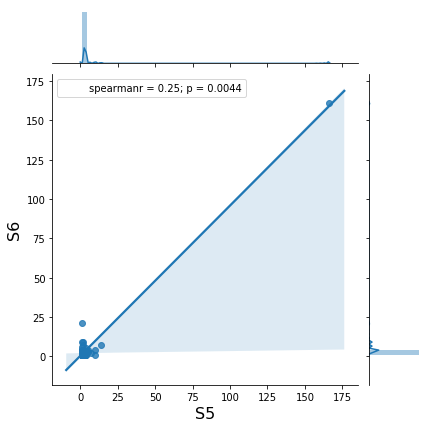

S7	S8	RAW


/home/taumata/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


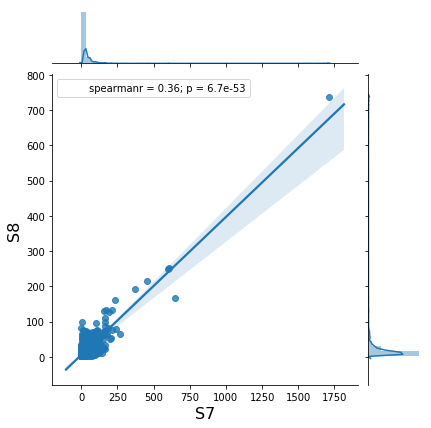

S7	S8	after MINNN


/home/taumata/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


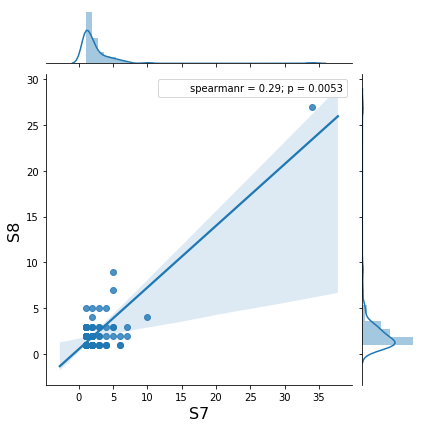

S9	S10	RAW


/home/taumata/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


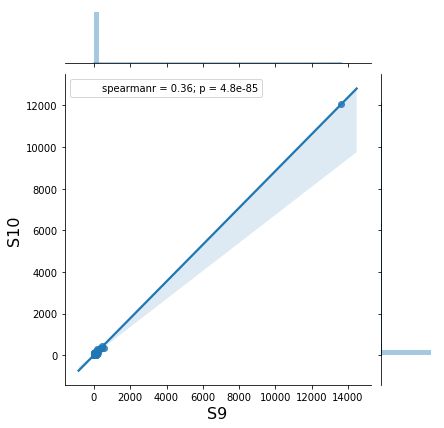

S9	S10	after MINNN


/home/taumata/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


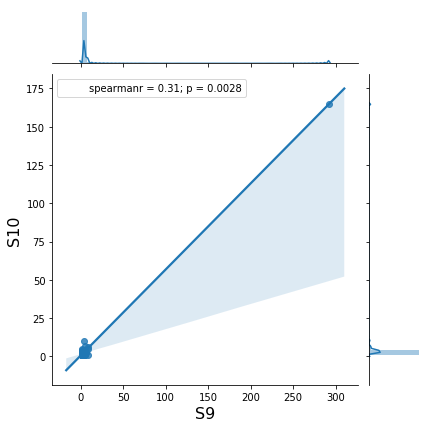

S11	S12	RAW


/home/taumata/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


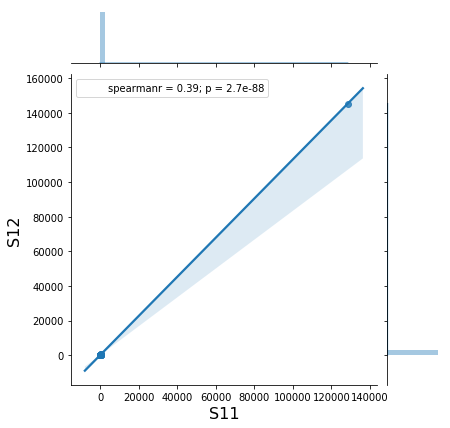

S11	S12	after MINNN


/home/taumata/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


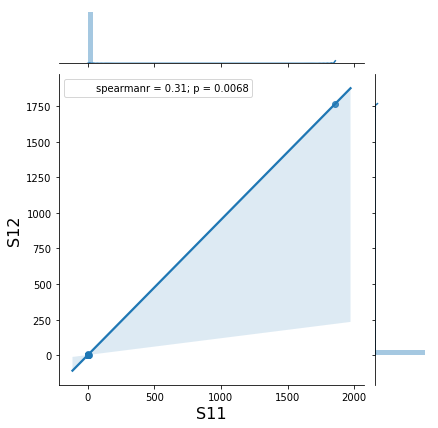

In [20]:
replicas=[("S1","S2"), ("S3","S4"), ("S5","S6"), ("S7","S8"), ("S9","S10"), ("S11","S12")]
for replica_pair in replicas:
    print("\t".join(replica_pair)+"\tRAW")
    plot_sample_correlation(replica_pair[0], replica_pair[1], True, min_count_1=1, min_count_2=1)
    plt.show()
    print("\t".join(replica_pair)+"\tafter MINNN")
    plot_sample_correlation(replica_pair[0], replica_pair[1], False, min_count_1=1, min_count_2=1)
    plt.show()

In [21]:
def plot_correlation_between_replicas(replica_pairs, min_count_1=1, min_count_2=1,min_count_3=1, min_count_4=1):
    corrs=[[],[]]                                  
    for pair in replica_pairs:
        sample1=pair[0]
        sample2=pair[1]
        merge = merge_pair(sample1, sample2, raw=True)
        filtered = merge[(merge.cloneCount_1 >= min_count_1) & (merge.cloneCount_2 >= min_count_2)]
        corr = spearmanr(filtered['cloneCount_1'], filtered['cloneCount_2'])
        corrs[0].append(corr[0])
        
        merge = merge_pair(sample1, sample2, raw=False)
        filtered = merge[(merge.cloneCount_1 >= min_count_3) & (merge.cloneCount_2 >= min_count_4)]                              
        corr = spearmanr(filtered['cloneCount_1'], filtered['cloneCount_2'])
        corrs[1].append(corr[0])

    plt.boxplot(corrs,labels=["Raw","MiNNN"])
    plt.ylabel("spearmanr")

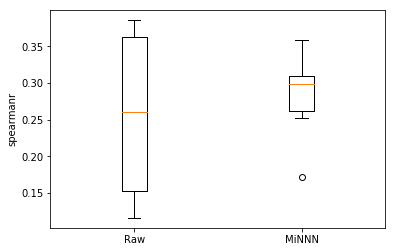

In [22]:
plot_correlation_between_replicas(replicas)

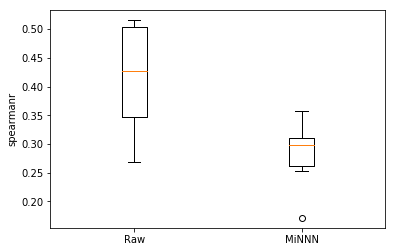

In [23]:
plot_correlation_between_replicas(replicas,min_count_1=10, min_count_2=10)

In [24]:
def plot_correlation_between_replicas_intersection(replica_pairs, min_count_1=1, min_count_2=1,min_count_3=1, min_count_4=1):
    corrs=[[],[]]                                  
    for pair in replica_pairs:
        sample1=pair[0]
        sample2=pair[1]
        merge = merge_pair(sample1, sample2, raw=True)
        filteredRAW = merge[(merge.cloneCount_1 >= min_count_1) & (merge.cloneCount_2 >= min_count_2)]
        goodRAW=filteredRAW.cloneCount_1
        
        merge = merge_pair(sample1, sample2, raw=False)
        filteredMINNN = merge[(merge.cloneCount_1 >= min_count_3) & (merge.cloneCount_2 >= min_count_4)]   
        goodMINNN=filteredMINNN.cloneCount_1

        filteredRAW=filteredRAW.loc[filteredRAW['cloneCount_1'].isin(goodMINNN)]
        filteredMINNN=filteredMINNN.loc[filteredMINNN['cloneCount_1'].isin(goodRAW)]
        
        
        corr = spearmanr(filteredRAW['cloneCount_1'], filteredRAW['cloneCount_2'])
        corrs[0].append(corr[0])
                             
        corr = spearmanr(filteredMINNN['cloneCount_1'], filteredMINNN['cloneCount_2'])
        corrs[1].append(corr[0])

    plt.boxplot(corrs,labels=["Raw","MiNNN"])
    plt.ylabel("spearmanr")

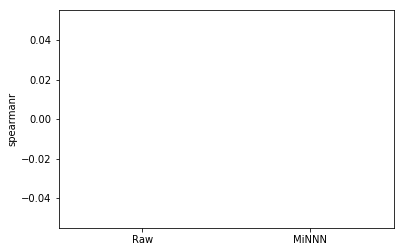

In [26]:
plot_correlation_between_replicas_intersection(replicas,min_count_1=10, min_count_2=10)